爬取b站视频评论：【南山见解】2020年了，我们中国的军工产业能打得过欧美了吗？

In [1]:
import requests
import json
import time
import pandas as pd
import random

def fetchURL(url):
    headers = {
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36',
    }

    try:

        r = requests.get(url, headers=headers)
        r.raise_for_status()
        print(r.url)
        return r.text

    except requests.HTTPError as e:
        print(e)
        print("HTTPError")

    except requests.RequestException as e:
        print(e)

    except:
        print("Unknown Error !")


def parserHtml(html):
    try:
        s = json.loads(html)

    except:
        print('error')

    commentlist = []
    hlist = []

    hlist.append("序号")
    hlist.append("昵称")
    hlist.append("性别")
    hlist.append("评论时间")
    hlist.append("评论内容")
    hlist.append("点赞数")
    hlist.append("回复数")
    hlist.append("个性签名")    
    hlist.append("等级")    
#     commentlist.append(hlist)

    # 楼层，用户名，性别，时间，评价，点赞数，回复数

    for i in range(20):  # range(a)中的a指每一页取前a条评论，b站标准20条所以填20。如果填1就会每一页取第一条，见test1。

        comment = s['data']['replies'][i]

        blist = []

        # 这个comment信息量相当大，基本上能搞到评论者个人主页上的所有信息，比如下面还可用comment['member']['sign']拿到签名

        # 具体查看可以拿到的数据：F12-network-手动评论区翻页动作-preview-jQuery-data-replies-0(随便开一个)-content(内容)/member(人)

        # floor = comment['floor']

        username = comment['member']['uname']

        sex = comment['member']['sex']

        ctime = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(comment['ctime']))
        content = comment['content']['message']
        likes = comment['like']
        rcounts = comment['rcount']
        signature = comment['member']['sign']
        level = comment['member']['level_info']['current_level']
        # blist.append(floor)
        blist.append(username)
        blist.append(sex)
        blist.append(ctime)
        blist.append(content)
        blist.append(likes)
        blist.append(rcounts)
        blist.append(signature)
        blist.append(level)
        commentlist.append(blist)

    writePage(commentlist)

    print('---' * 20)


def writePage(urating):
    dataframe = pd.DataFrame(urating)

    dataframe.to_csv('southcomment.csv', mode='a', index=False, sep=',', header=False, encoding="utf_8_sig")


# 当然，每次csv应当换名字。追加Office打开的csv会报错。


if __name__ == '__main__':
    e = 0
    page = 1
    while e == 0:
        url = "https://api.bilibili.com/x/v2/reply?pn=" + str(
            page) + "&type=1&oid=414087151&sort=2&_=1609937800830"
        # 这里"oid="后面是要爬的av号
        try:
            html = fetchURL(url)
            print('page:', page)

            parserHtml(html)

            page = page + 1
            if page % 10 == 0:
                time.sleep(5)  # 每爬一页便(假装)歇几秒，怕封IP
        except:
            e = 1



https://api.bilibili.com/x/v2/reply?pn=1&type=1&oid=414087151&sort=2&_=1609937800830
page: 1
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=2&type=1&oid=414087151&sort=2&_=1609937800830
page: 2
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=3&type=1&oid=414087151&sort=2&_=1609937800830
page: 3
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=4&type=1&oid=414087151&sort=2&_=1609937800830
page: 4
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=5&type=1&oid=414087151&sort=2&_=1609937800830
page: 5
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=6&type=1&oid=414087151&sort=2&_=1609937800830
page: 6
------------------------------------------------------------
https://api.bilibili.com/x/v2/reply?pn=7&type=1&oid=414087151&sort=2&_=16099

以上的程序可以实现爬取该视频下评论并生成csv文件----southcomment.csv

In [3]:
import pandas as pd

data = pd.read_csv(r"southcomment.csv")
col = ['username', 'sex', 'ctime', 'content', 'likes', 'rcounts', 'signature', 'level']
data.columns = col
data.head()

,username,sex,ctime,content,likes,rcounts,signature,level
0,星源2012,男,2020-07-27 20:01:20,不卑不亢，不骄不躁。继续前进[加油][加油],2624,83,相呴以湿，相濡以沫，不如相忘于江湖。与其誉尧而非桀也，不如两相忘而化其道。,5
1,没什么想法的飞飞,男,2020-07-27 20:09:09,送人上天的是航天科技，送人上西天的是航天科工。,2670,38,卑以自牧，自强不息,4
2,羽黑ちゃん,保密,2020-07-27 21:17:23,欢迎报考国防七子，\n欢迎加入\n中国核工业集团有限公司\n中国航天科技集团有限公司\n中国...,1136,51,この戦いが終わったら…し、司令官さんと一緒に…！あの…あ、あのあの！,6
3,洛翰铁骑遍天下,保密,2020-07-27 20:23:44,在这里我顺便推荐一下另一个UP双尾彗星解读的美国兰德在17年发表的《兰德未来战争》当中的解读...,1540,136,机器/西幻/科幻/怪物与龙亚文化/国家主义/钢铁直男/暗之战士/死亡领主,4
4,正常人枭歌儿,男,2020-07-27 21:12:09,#转自 忘记了( ๑ŏ ﹏ ŏ๑ )#\n其实判断一个政府是不是负责，在于他是否能看到未来，...,1767,80,曾用名：暗影龙符,4


查看数据的基本情况，包括：count 非空值数、mean 平均值、std 标准差、max 最大值、min 最小值、（25%、50%、75%）分位数等。

In [5]:
data.describe()

,likes,rcounts,level
count,859.000000,859.000000,859.000000
mean,19.534342,2.081490,4.747381
std,166.825278,13.854737,0.774131
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,1.000000,0.000000,5.000000
max,2670.000000,243.000000,6.000000


In [6]:
data = data.dropna(axis=1)
data.dropna(axis=1)#处理缺失数据，丢弃带有NAN的所有项
# axis: 删除行还是列，行是0或index,列是1或column，默认是行

,username,sex,ctime,content,likes,rcounts,level
0,星源2012,男,2020-07-27 20:01:20,不卑不亢，不骄不躁。继续前进[加油][加油],2624,83,5
1,没什么想法的飞飞,男,2020-07-27 20:09:09,送人上天的是航天科技，送人上西天的是航天科工。,2670,38,4
2,羽黑ちゃん,保密,2020-07-27 21:17:23,欢迎报考国防七子，\n欢迎加入\n中国核工业集团有限公司\n中国航天科技集团有限公司\n中国...,1136,51,6
3,洛翰铁骑遍天下,保密,2020-07-27 20:23:44,在这里我顺便推荐一下另一个UP双尾彗星解读的美国兰德在17年发表的《兰德未来战争》当中的解读...,1540,136,4
4,正常人枭歌儿,男,2020-07-27 21:12:09,#转自 忘记了( ๑ŏ ﹏ ŏ๑ )#\n其实判断一个政府是不是负责，在于他是否能看到未来，...,1767,80,4
...,...,...,...,...,...,...,...
854,哇哦我很好奇,保密,2020-07-27 20:03:04,来了,0,0,4
855,牛b闪闪像太阳,保密,2020-07-27 20:03:00,第五,0,0,4
856,qahxbh,保密,2020-08-18 22:23:00,連光刻機都造不出來，還跟歐美比，沒有光刻機，就生產不出芯片，沒芯片，飛單衛星全都是瞎子,1,2,4
857,苍山行者,保密,2020-07-28 16:27:47,目前的科技发展态势，如果大环境遭到封锁，差距会越拉越大，不到5年就会拉开一个代差的感觉，所以...,0,5,5


In [7]:
data = data.drop_duplicates()
data.drop_duplicates()#去除重复项

,username,sex,ctime,content,likes,rcounts,level
0,星源2012,男,2020-07-27 20:01:20,不卑不亢，不骄不躁。继续前进[加油][加油],2624,83,5
1,没什么想法的飞飞,男,2020-07-27 20:09:09,送人上天的是航天科技，送人上西天的是航天科工。,2670,38,4
2,羽黑ちゃん,保密,2020-07-27 21:17:23,欢迎报考国防七子，\n欢迎加入\n中国核工业集团有限公司\n中国航天科技集团有限公司\n中国...,1136,51,6
3,洛翰铁骑遍天下,保密,2020-07-27 20:23:44,在这里我顺便推荐一下另一个UP双尾彗星解读的美国兰德在17年发表的《兰德未来战争》当中的解读...,1540,136,4
4,正常人枭歌儿,男,2020-07-27 21:12:09,#转自 忘记了( ๑ŏ ﹏ ŏ๑ )#\n其实判断一个政府是不是负责，在于他是否能看到未来，...,1767,80,4
...,...,...,...,...,...,...,...
854,哇哦我很好奇,保密,2020-07-27 20:03:04,来了,0,0,4
855,牛b闪闪像太阳,保密,2020-07-27 20:03:00,第五,0,0,4
856,qahxbh,保密,2020-08-18 22:23:00,連光刻機都造不出來，還跟歐美比，沒有光刻機，就生產不出芯片，沒芯片，飛單衛星全都是瞎子,1,2,4
857,苍山行者,保密,2020-07-28 16:27:47,目前的科技发展态势，如果大环境遭到封锁，差距会越拉越大，不到5年就会拉开一个代差的感觉，所以...,0,5,5


In [8]:
data = data.sort_values(by='likes',ascending=False,inplace=False)#排序函数
data = data[~data['level'].isin(['LVn等级'])]
data

,username,sex,ctime,content,likes,rcounts,level
1,没什么想法的飞飞,男,2020-07-27 20:09:09,送人上天的是航天科技，送人上西天的是航天科工。,2670,38,4
0,星源2012,男,2020-07-27 20:01:20,不卑不亢，不骄不躁。继续前进[加油][加油],2624,83,5
4,正常人枭歌儿,男,2020-07-27 21:12:09,#转自 忘记了( ๑ŏ ﹏ ŏ๑ )#\n其实判断一个政府是不是负责，在于他是否能看到未来，...,1767,80,4
3,洛翰铁骑遍天下,保密,2020-07-27 20:23:44,在这里我顺便推荐一下另一个UP双尾彗星解读的美国兰德在17年发表的《兰德未来战争》当中的解读...,1540,136,4
2,羽黑ちゃん,保密,2020-07-27 21:17:23,欢迎报考国防七子，\n欢迎加入\n中国核工业集团有限公司\n中国航天科技集团有限公司\n中国...,1136,51,6
...,...,...,...,...,...,...,...
415,都是命耶,保密,2020-07-28 06:29:53,你这标题起的，是打算下期再说吗？,0,0,5
416,Privv,保密,2020-07-28 05:45:42,下一期讲半导体吗,0,0,5
417,SinSinSin,男,2020-07-28 05:36:28,突然想起今天在WB看到一个评论说别瞧不起日本军事，跟中国差不多。\n于是我问他，差不多何解？...,0,0,5
418,二大爷的晚年幸福生活,保密,2020-07-28 05:02:33,中船人表示海上实力，绝对不行。[无语],0,0,5


上面程序实现评论按照点赞数由多到少排列

In [10]:
data[data['level'] > 5]

,username,sex,ctime,content,likes,rcounts,level
2,羽黑ちゃん,保密,2020-07-27 21:17:23,欢迎报考国防七子，\n欢迎加入\n中国核工业集团有限公司\n中国航天科技集团有限公司\n中国...,1136,51,6
6,劣勃杀手魔洛特,保密,2020-07-27 20:16:28,076，055，DF17比同类国外产品先进没问题吧，上了增推版ws10B的J20至少不会比F...,850,243,6
11,倒悬的月神,保密,2020-07-27 20:01:28,军工不都是一群神仙吗,281,14,6
20,S-T-eve,保密,2020-07-27 20:07:54,打不過，但讓對方難受是足夠的了[吃瓜],111,19,6
25,Erodeox,男,2020-07-27 20:26:36,请给予军工产业从业者体面的待遇！,44,2,6
...,...,...,...,...,...,...,...
433,米尔希欧蕾,男,2020-07-28 01:17:47,打得过欧洲打不过美国,0,0,6
436,神楽めあOfficiaI,保密,2020-07-28 01:11:00,还有差，继续努力,0,0,6
402,ZFY的长辈,男,2020-07-28 08:42:36,马家沟造船厂去船厂的工资是去互联网通信企业的一半或者更少吧[吃瓜],0,0,6
408,安可竹竹酱,保密,2020-07-28 08:11:28,欧美加起来就几乎等于世界了，这是要单挑世界么,0,0,6


上面程序实现从中抽取出评论中等级大于5级的b站用户

In [11]:
from pyecharts.globals import CurrentConfig, NotebookType
# 只需要在顶部声明 CurrentConfig.ONLINE_HOST 即可
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB
# 接下来所有图形的静态资源文件都会来自刚启动的服务器
CurrentConfig.ONLINE_HOST

'https://assets.pyecharts.org/assets/'

In [13]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

bar=Bar(init_opts=opts.InitOpts(width="800px", height="400px"))
bar.add_xaxis(data['content'].tolist())
bar.add_yaxis("likes", data["likes"].tolist(), color=Faker.rand_color())
bar.set_global_opts(
    title_opts = opts.TitleOpts(title="评论热度Top榜"),
    datazoom_opts = [opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
)
# bar.render("柱形图.html")
bar.load_javascript()
bar.render_notebook()

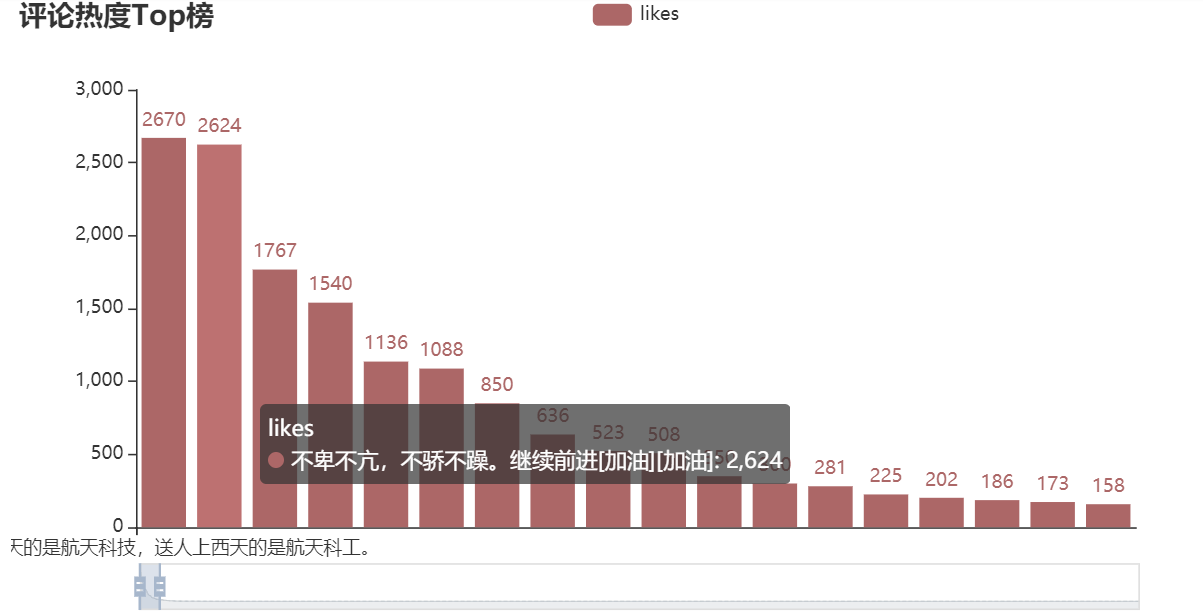

In [18]:
from IPython.display import Image
Image('等级分布.png')

因为上面的数据可视化图在不同电脑上未配置可能显示有问题，因此截图予以说明
.
.
.
.

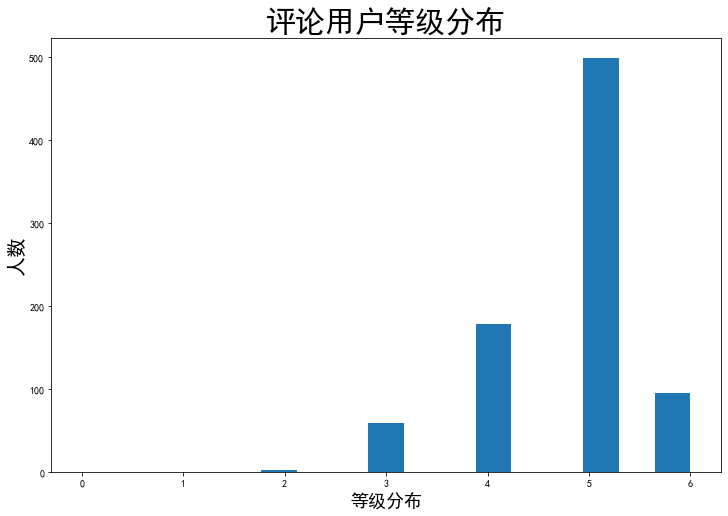

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data.columns
level = data['level']

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(12, 8))
plt.hist(level, bins=17)
plt.xlabel('等级分布', size=18)
plt.ylabel('人数', size=20)
plt.title('评论用户等级分布', size=30)
# plt.savefig('shiguanjiaodu.jpg')#plt里面，save一定要放在show之前，否则将保存到白色图片，因为show之后已经开始了新的空白窗口
plt.show()

In [23]:
data.level.value_counts().sort_index(ascending=False)

6     96
5    499
4    179
3     60
2      3
0      1
Name: level, dtype: int64

In [24]:
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c1 = (
    Pie()
    .add(
        "",
        [list(z) for z in zip([str(i) for i in range(2,7)], [45,123,225,283,62])],
        radius=["40%", "75%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="等级分布"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render_notebook()
)
c1

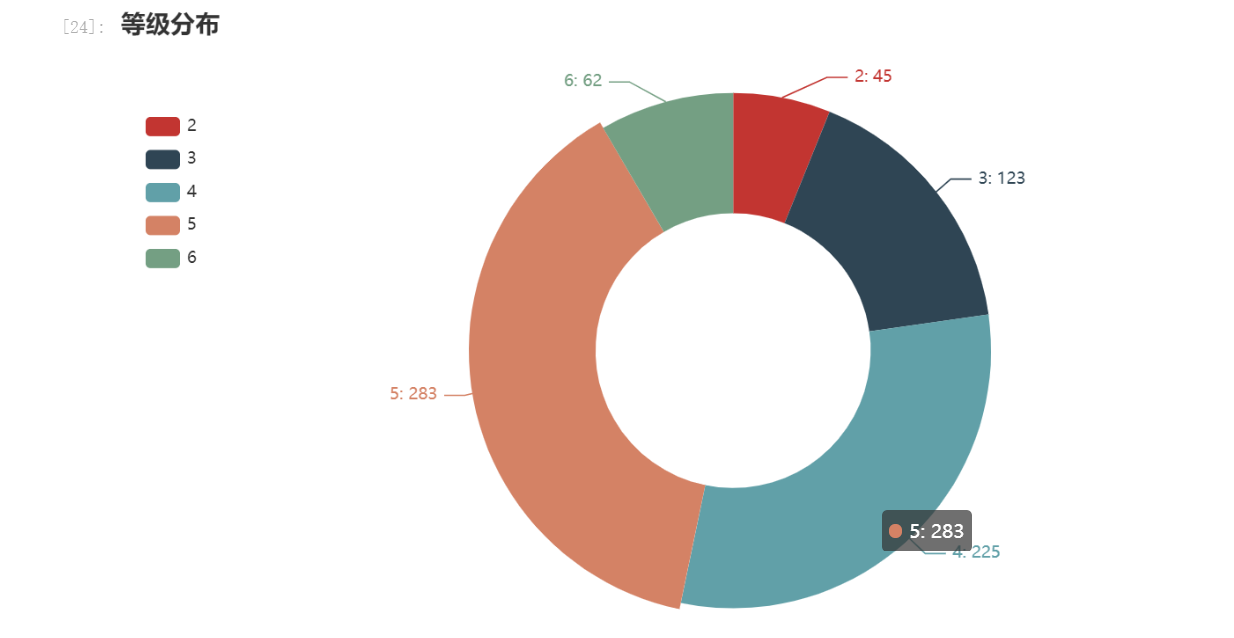

In [25]:
from IPython.display import Image
Image('等级分布可视化.png')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 0.913 seconds.
Prefix dict has been built successfully.


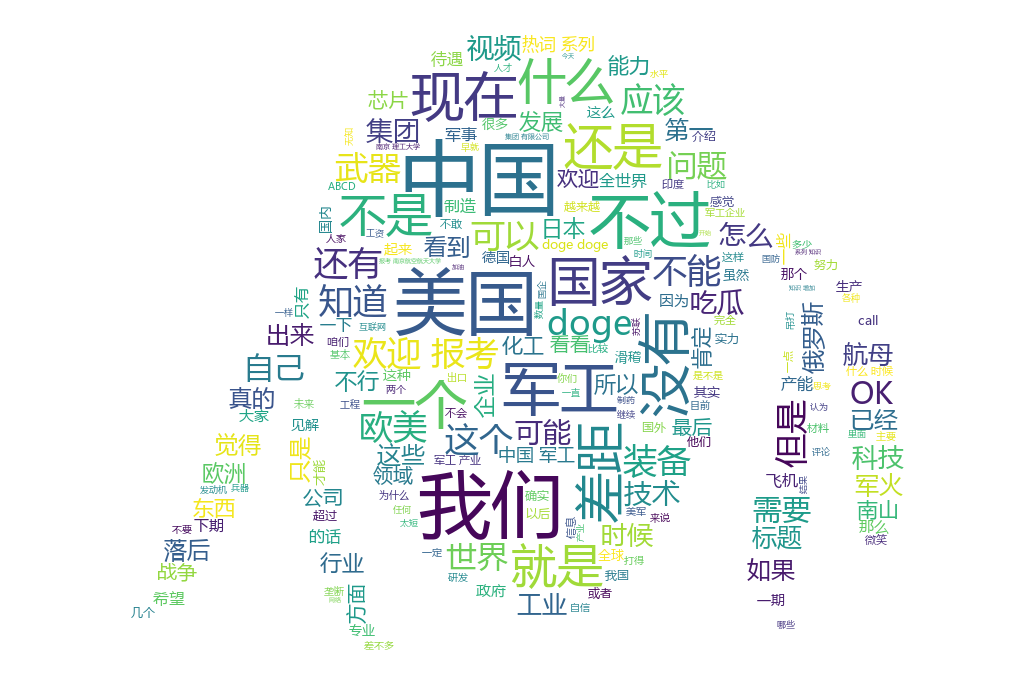

In [26]:
import os
import pandas as pd
import jieba
from imageio import imread
from wordcloud import WordCloud

all_content = ''
list_txt = []
# data = pd.read_csv('comment.csv')

for i in data['content']:
    all_content += str(i)
for c in jieba.cut(all_content):
    if len(c) >= 2:
        list_txt.append(c)
cut_text = " ".join(list_txt)

mask = imread('11111.jfif')

wordshow = WordCloud(background_color='white',
                     width=800,
                     height=600,
                     max_words=200,
                     max_font_size=80,
                     font_path="msyh.ttc",    #用微软雅黑作为字体显示效果
                     mask = mask,             #转为词云形状
                      ).generate(cut_text)
 
wordshow.to_file('one.png')  # 转换成图片
from IPython.display import Image
Image('one.png')

性别分布

In [27]:
data.sex.value_counts().sort_index(ascending=False)

男     385
女      25
保密    428
Name: sex, dtype: int64

In [28]:
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c2 = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(["男","女","保密"], ["404",'103','673'])],
        radius=["40%", "75%"],
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="性别分布"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render_notebook()
    
)
c2

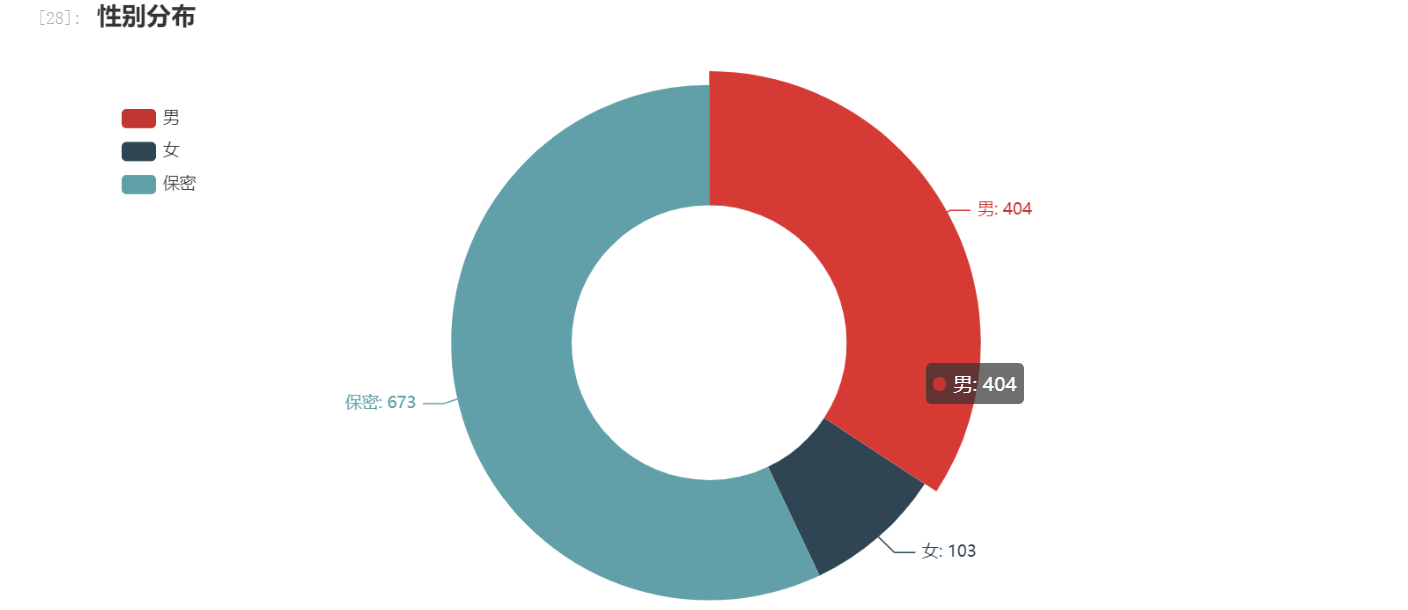

In [29]:
from IPython.display import Image
Image('性别分布.png')

In [30]:
import json, requests
import pandas as pd
from datetime import *
import time


def get_base_info(oid):
    base_info_url = f'https://api.bilibili.com/x/web-interface/archive/stat?aid={oid}'
    base_info = requests.get(base_info_url, headers=dic_header).json()['data']
    # print(base_info) #可以输出转化为json形式的数据
    print('【南山见解】2020年了，我们中国的军工产业能打得过欧美了吗？视频基本信息：\n')
    print('播放数量：{}\n弹幕数量：{}\n收藏数量：{}\n硬币数量：{}\n分享数量：{}\n点赞数量：{}\n------\n评论数量：{}'.format(
        base_info['view'], base_info['danmaku'], base_info['favorite'],
        base_info['coin'], base_info['share'], base_info['like'], base_info['reply']
    ))

def get_comment_datas(oid):
    comment_url = 'https://api.bilibili.com/x/v2/reply'
    comment_page = 1
    comment_data_lst = []
    while True:
        try:
            param = {'callback': 'jQuery172002097397522090838_' + str(now_time),
                     'jsonp': 'jsonp',
                     'pn': comment_page,
                     'type': '1',
                     'oid': oid,
                     'sort': '2',
                     '_': now_time}

            html = requests.get(url=comment_url, headers=dic_header, params=param)
            start = html.text.index('{')
            end = html.text.index('})') + 1
            comment_data = json.loads(html.text[start:end])['data']['replies']
            # print(comment_data) #成功的转换为json数据
            print(f'当前正在爬取第{comment_page}页评论数据...')
            dic_coment = None
            for data in comment_data:
                dic_coment = {}
                dic_coment['member'] = data['member']['uname']
                dic_coment['like'] = data['like']
                dic_coment['comment'] = data['content']['message']
                dic_coment['time'] = datetime.fromtimestamp(data['ctime'])
                dic_coment['rpid'] = data['rpid_str']
                comment_data_lst.append(dic_coment)
                print('昵称: {}\n点赞数：{}\n'.format(dic_coment['member'], dic_coment['like']))
                # comment_data_lst.extend(get_reply_data(comment_page,dic_coment['rpid']))
                # 这个是下一步封装完爬取回复数据的函数后才添加的

            time.sleep(3)
            # 			if comment_page > 1:
            # 				break
            comment_page += 1

        except Exception as Comment_Page_Error:
            break

    return comment_data_lst

def get_reply_data(comment_page,rpid):
    reply_page = 1
    reply_data_lst =[]
    while True:
        print('正在爬取第{}页评论数据中的第{}页的回复数据......'.format(comment_page,reply_page))
        reply_url = 'https://api.bilibili.com/x/v2/reply/reply?&pn={}&type=1&oid=203575874&ps=10&root={}'.format(reply_page,rpid)
        html = requests.get(url=reply_url, headers=dic_header)
        reply_data = html.json()['data']['replies']
        try:
            for data in reply_data:
                dic_reply = {}
                dic_reply['comment'] = data['content']['message']
                dic_reply['member'] = data['member']['uname']
                dic_reply['like'] = data['like']
                dic_reply['time'] = datetime.fromtimestamp(data['ctime'])
                reply_data_lst.append(dic_reply)
                print('昵称: {}\n点赞数：{}\n'.format(dic_reply['member'],
                        dic_reply['like'] ))
# 			if reply_page > 1:
# 				break
            reply_page += 1

        except Exception as Reply_Page_Error:
            break

    return reply_data_lst



获取该视频的基本信息
播放数量
弹幕数量
收藏数量
硬币数量
分享数量
点赞数量
------
评论数量

In [32]:
if __name__ == '__main__':
    dic_header = {'User-Agent': 'Mozilla/5.0'}
    oid = 414087151
    get_base_info(oid)

【南山见解】2020年了，我们中国的军工产业能打得过欧美了吗？视频基本信息：

播放数量：803963
弹幕数量：5025
收藏数量：4313
硬币数量：3873
分享数量：1038
点赞数量：34809
------
评论数量：2945


In [33]:
if __name__ =='__main__':
    dic_header = {
    'User. Agent ': 'Mozilla/5.8',
    'Referer': 'https://www.bilibili.com/video/BV1WV411z7qj'
    }
    oid = 414087151
    now_time = int(time.time()*1000)
    # get_ base. info(2616308358)
    df = pd.DataFrame(get_comment_datas(oid))
    df.to_csv('comment1.csv', mode='a', index=False, sep=',', header=False, encoding="utf_8_sig")
    print(df.head())
    print(len(df))

当前正在爬取第1页评论数据...
昵称: 来自地球的ETuT
点赞数：5628

昵称: 星源2012
点赞数：2624

昵称: 没什么想法的飞飞
点赞数：2670

昵称: 羽黑ちゃん
点赞数：1136

昵称: 洛翰铁骑遍天下
点赞数：1540

昵称: 正常人枭歌儿
点赞数：1767

昵称: 啊啊啊阿瑞啊
点赞数：1088

昵称: 劣勃杀手魔洛特
点赞数：850

昵称: 折纸大湿Official
点赞数：508

昵称: 键舞九天
点赞数：523

昵称: 16-炸酱
点赞数：350

昵称: ref_1u_pa
点赞数：300

昵称: 倒悬的月神
点赞数：281

昵称: 丿桂言叶丶
点赞数：636

昵称: OrionNebula
点赞数：158

昵称: 戈斯罗斯
点赞数：141

昵称: 超级无敌汤
点赞数：173

昵称: 泰拉桑
点赞数：186

昵称: Anita_Q
点赞数：136

昵称: 正常人枭歌儿
点赞数：225

当前正在爬取第2页评论数据...
昵称: Popsicle-v-
点赞数：81

昵称: S-T-eve
点赞数：111

昵称: 战淴橘晋北办事处
点赞数：61

昵称: 罗若武
点赞数：51

昵称: 圣殿大祭司
点赞数：51

昵称: 斜月晓霜
点赞数：44

昵称: Erodeox
点赞数：44

昵称: blackcater丶
点赞数：100

昵称: 低情商ZZ1024
点赞数：202

昵称: 阿祖偌
点赞数：27

昵称: 皮皮蛋奶
点赞数：68

昵称: 云_寂_
点赞数：37

昵称: ICWAN2017
点赞数：18

昵称: 玉慕贤
点赞数：21

昵称: 陈平盾山论剑
点赞数：23

昵称: 二次元无产领袖
点赞数：16

昵称: 治愈系小橘子
点赞数：22

昵称: 东北京人
点赞数：15

昵称: 雪之下雪乃ヾ
点赞数：18

昵称: 半瓢蛋青
点赞数：32

当前正在爬取第3页评论数据...
昵称: 澈羽
点赞数：14

昵称: 诩-文桓
点赞数：13

昵称: 默彧喜欢喝酸奶
点赞数：18

昵称: xxeeyy
点赞数：11

昵称: 心×恋
点赞数：13

昵称: 隆美尔1995
点赞数：13

昵称: 一只觋夕莉
点赞数：10

昵称: 西安工业大学
点赞数：12

昵称: 